In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:


def extrae(ticker, start_date, end_date):
    """
    Descarga los precios históricos de un ticker y grafica su precio de cierre.

    Args:
    ticker (str): El símbolo del ticker (por ejemplo, 'AAPL' para Apple, 'TSLA' para Tesla, 'BTC-CAD' para Bitcoin en CAD).
    start_date (str): La fecha de inicio en formato 'YYYY-MM-DD'.
    end_date (str): La fecha de fin en formato 'YYYY-MM-DD'.
    """
    # 1. Descargar los precios históricos usando yfinance
    data = yf.download(ticker, start=start_date, end=end_date)  # Especificamos el rango de fechas
    #2. Verificar si los datos se descargaron correctamente
    if data.empty:
        print(f"No se encontraron datos para el ticker {ticker} en el rango de fechas especificado.")
        return
    #3. Aplanar el MultiIndex de las columnas
    data.columns = [col[0] for col in data.columns]
    #4. plot
    data['Close'].plot(title=f"Precio de Cierre de {ticker}", figsize=(10, 6))
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.grid(True)
    plt.show()
    return data
# Funcion que realiza graficos de lineas
def lineas_multiples(data, title='Gráfico de Múltiples Líneas', xlabel='Eje X', ylabel='Eje Y'):
    """
    Función para graficar múltiples líneas con colores aleatorios.
    
    Parámetros:
    - data: DataFrame de pandas con los datos a graficar.
    - title: Título del gráfico.
    - xlabel: Etiqueta del eje X.
    - ylabel: Etiqueta del eje Y.
    """
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    num_lines = data.shape[1]  # Número de líneas (columnas en el DataFrame)
    
    # Generar un color aleatorio para cada línea
    colors = np.random.rand(num_lines, 3)  # Colores aleatorios en RGB

    for i in range(num_lines):
        plt.plot(np.arange(1, data.shape[0] + 1), data.iloc[:, i], color=colors[i], label=f'Línea {i + 1}')  # Acceso corregido
    
    # Configurar título y etiquetas
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Mostrar la cuadrícula
    plt.grid(True)
    
    # Mostrar leyenda
    #plt.legend()
    
    # Mostrar el gráfico
    plt.show()
    
#Procedemos a crear una funcion que modele el proceso estocastico
def MGB_acciones(data,col_name,steps):

    #Los parametros de la funcion son:
    #data -> pandas df que contiene los retornos logaritmicos del activo en dias
    #col_name -> nombre de la columna de los retornos
    #steps -> numero de pasos hacia adelante en el proceso estocastico
    data['retornos']=(data['Adj Close'] / data['Adj Close'].shift(1)).apply(lambda x: np.log(x))
    mu=data['retornos'].mean()
    sigma = data['retornos'].std()
    dt=1/len(data) # cantidad dias en muestra--1/152
    s0=data[col_name].iloc[-1] #Tomamos el ultimo elemento de los precios, ya que este sera el punto de partida
    et=np.random.normal(loc=0, scale=1, size=steps) # Vector de numeros aletorios de media 0 y desviacion estandar 1
    euler = np.exp(((mu - (sigma*sigma) / 2) * dt) + sigma * et * np.sqrt(dt))

    st_1=[]

    for i in range(0,steps):

        if i==0:
            s=s0*euler[0]
        else:
            s=st_1[i-1]*euler[i]

        st_1.append(s)
            

    return st_1

   

    


[*********************100%***********************]  1 of 1 completed

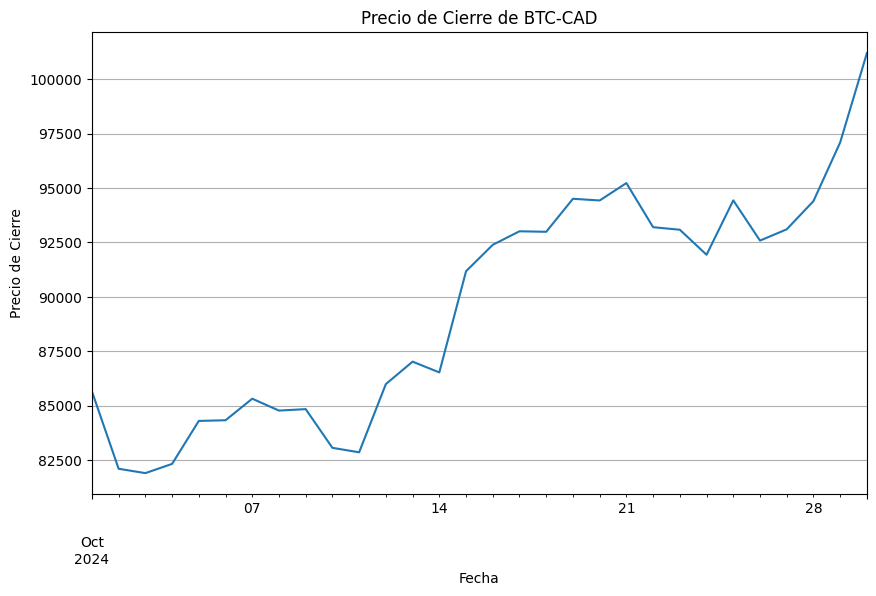

1
2
3
4
5
6
7
8
9


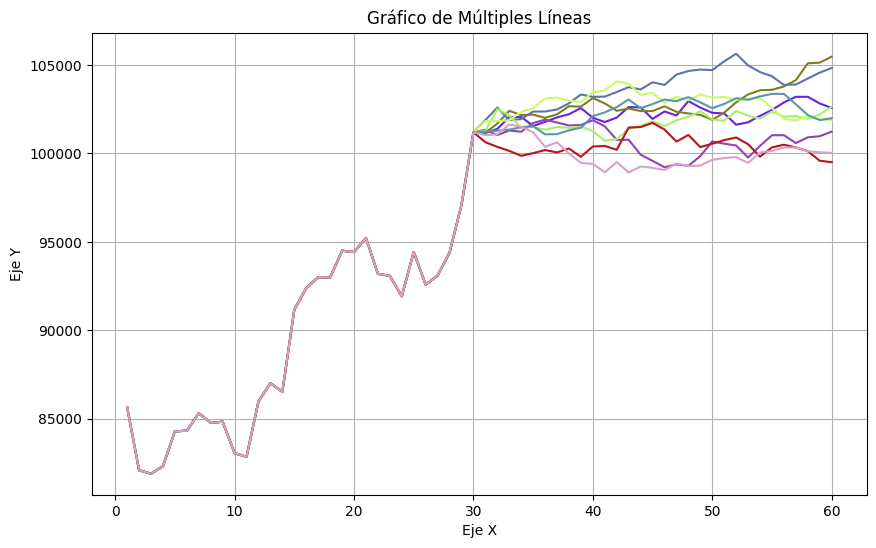

In [10]:
# Parametros extraccion 
Montecarlo_results = pd.DataFrame()
ticker = 'BTC-CAD'  
start_date = '2024-10-01'
end_date = '2024-10-31'
iter=10
# Llamar a la función extrae
data=extrae(ticker, start_date, end_date)
#aplica montecarlo
for i in range(1,iter):

    print(i)

    Montecarlo_results['itera_'+str(i)]=pd.concat([data['Adj Close'],pd.Series(MGB_acciones( data, 'Adj Close',len(data)))])
lineas_multiples(Montecarlo_results, title='Gráfico de Múltiples Líneas', xlabel='Eje X', ylabel='Eje Y')



In [6]:
#Calculamos la probabilidad de perder 5% de la inversion inicial en el próximo año
s0=data['Adj Close'].iloc[-1]
print('El precio de compra es: ', s0)

El precio de compra es:  101196.0234375


In [7]:
Montecarlo_results.tail()

,itera_1,itera_2,itera_3,itera_4,itera_5,itera_6,itera_7,itera_8,itera_9,itera_10,...,itera_90,itera_91,itera_92,itera_93,itera_94,itera_95,itera_96,itera_97,itera_98,itera_99
25,99438.709523,99639.548135,101163.683027,102240.908815,104224.148171,101193.674592,104471.692911,100955.057710,101933.227231,103101.986546,...,102340.171504,99345.859773,102483.404755,100727.619644,104612.967455,102516.811860,101738.734315,102406.660263,103256.208553,102204.897243
26,99485.122213,99849.921319,101119.553823,102460.920284,104241.167164,101063.090884,103710.307546,101521.041177,102155.327337,102866.545959,...,103220.072022,99269.276274,102130.643414,99958.698532,104449.370182,102559.383032,101563.041778,102121.490819,103887.868414,102398.520700
27,99484.268591,99638.532915,100844.389772,101573.579209,104221.666305,100939.760780,103378.758193,101977.661806,101908.333859,102628.372947,...,103665.876851,99734.643323,102640.588938,99913.673436,104632.042941,102660.526370,101582.014833,102485.515150,104180.049930,103036.736033
28,99596.400127,100074.959650,101198.442740,101312.412995,104058.456480,100944.328624,103438.293827,102485.101608,101656.291536,102746.579216,...,103100.892117,99529.026987,103046.984198,99958.939567,104183.752992,103034.291666,101764.457156,102227.213346,104471.889591,102190.804844
29,100056.725684,100373.039329,101305.119879,101178.353067,104340.628701,100698.477747,103250.711724,101974.928301,101889.319554,102264.774163,...,103389.340171,99341.283021,102596.990755,99958.132488,103860.671172,102914.456179,101156.214490,103379.217218,105129.591718,102565.331489


In [8]:
precios_cierre = Montecarlo_results.iloc[-1,:] #Seleccionamos los precios finales a un año de inversion
precios_cierre

itera_1     100056.725684
itera_2     100373.039329
itera_3     101305.119879
itera_4     101178.353067
itera_5     104340.628701
                ...      
itera_95    102914.456179
itera_96    101156.214490
itera_97    103379.217218
itera_98    105129.591718
itera_99    102565.331489
Name: 29, Length: 99, dtype: float64

In [9]:
total=len(precios_cierre)
exito=len(precios_cierre[precios_cierre<(s0*0.95)])

p=exito/total

print(p*100,'%')

0.0 %
